This is an important problem with political implications !
Attached is an op-ed article from the washington post
(https://www.washingtonpost.com/news/volokh-conspiracy/wp/2015/10/06/zero-correlation-between-state-homicide-rate-and-state-gun-laws/ )
that claimed there was no correlation between gun-control and homicide rates.
But this argument is based on faulty use (abuse) of statistics. You are
going to prove it. 

Extract the data from the plot (gun_homicide_graph.jpg ,
using Web Plot Digitizer (https://automeris.io/WebPlotDigitizer/ ),
worth learning, as it will be useful in other real-life applications,
(an example output is provided in here data_extracted_from_graph.csv.xlsx)

**1)  How well does your extracted data files compare with the data in the
excel file of the raw data. What would you use to compare the two sets of data ?**
      

In [1]:
library(readxl) # to read the excel file
library(energy) # for the distance correlation package

In [23]:
# Given extracted data 
given_data <- read_excel("stategundata.xlsx")

# My extracted data
tiff_data <- read.csv("tiff_extracted_from_graph.csv", header = FALSE)
colnames(tiff_data) <- c("Sum", "Brady score") # rename cols
head(given_data) # just to look 
head(tiff_data)
# for the tiff_data, first column (X) is Homicides + fatal gun acidents per 100,000 people
# second column (Y) is Brady campaign gun law score for state

New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...15`
• `` -> `...16`


Jurisdiction,Homicide rate,Gun accident rate,Sum,Brady score,Brady grade,...7,...8,...9,...10,...11,...12,...13,Nat'l Journal score,...15,...16,(Hidden colums G through M are the components of the National Journal score)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
Alabama,7.1,0.44,7.54,3.5,D‐,0,0,0,0,0.5,0,0,0.5,NA,NA,"Homicide rate: Proquest Statistical Abstract of the United States, 2015 (2012 data, from Justice Department)"
Alaska,4.1,0.00,4.10,-7.0,F,0,0,0,0,0.0,0,0,0.0,NA,NA,Brady score & grade: http://www.bradycampaign.org/sites/default/files/SCGLM-Final10-spreads-points.pdf (2013 data)
Arizona,5.5,0.10,5.60,-8.0,F,0,0,0,0,0.0,0,0,0.0,NA,NA,"Washington, D.C. Brady score & grade: My own estimate, based on Brady's procedures, and likely an underestimate"
Arkansas,5.9,0.41,6.31,1.0,F,0,0,0,0,0.5,1,0,1.5,NA,NA,"Gun accident rate: CDC WISQARS Fatal Injury Reports, 1999-2013, for National, Regional, and States (2011-13 data)"
California,5.0,0.08,5.08,75.0,A‐,1,1,1,1,1.0,1,1,7.0,NA,NA,NA
Colorado,3.1,0.18,3.28,14.5,C,0,1,0,0,0.5,0,0,1.5,NA,NA,NA


,Sum,Brady score
,<dbl>,<dbl>
1,5.065889,75.02203
2,4.097795,70.00000
3,4.395003,68.41410
4,1.784129,60.22026
5,2.081456,58.37004
6,3.506703,65.77093


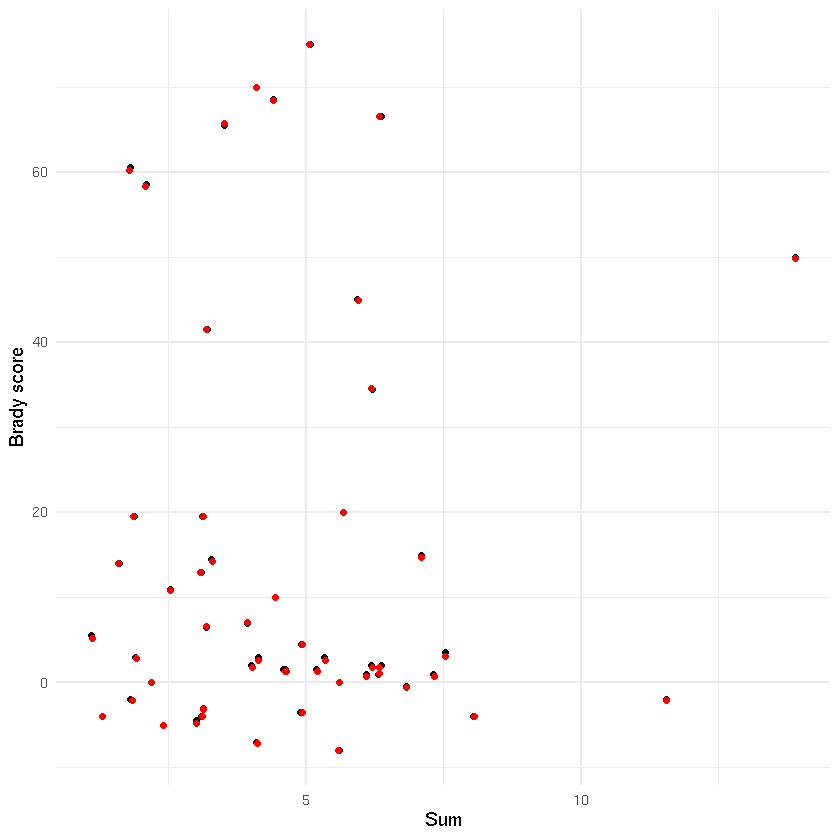

In [36]:
library(ggplot2)
# # Trouble shooting code below, plotted each individually 
# plot1 <- ggplot(given_data, aes(x = Sum, y = `Brady score`)) +
#   geom_point()

# print(plot1)

# plot2 <- ggplot(tiff_data, aes(x = V1, y = V2)) +
#   geom_point()
# print(plot2)
# Both plot separately

#Making a scatter plot and plotting both on the same graph
combined_plot <-ggplot(given_data, aes(x= Sum, y =`Brady score`)) +
    geom_point() + # plots given data in black
    geom_point(data = tiff_data, color='red') +  #plots tiff extracted data in red
    theme_minimal()
print(combined_plot)


From the scatter plots, it is evident that the extracted data closely mirrors the raw given data. The two datasets appear nearly identical, with very little variation between them.

      
**2) Analyze the data (excel sheet with data is provided) using Pearson's
correlation.**
      

In [32]:
pearson_corr <- cor(given_data$Sum, given_data$`Brady score`, method = "pearson")
print(pearson_corr)

[1] 0.03197742


A Pearson correlation coefficient of 0.0319 indicates a very weak positive relationship between the Sum (homicide rate) and Brady score (gun laws). This value is close to 0, suggesting almost no linear correlation between the two variables.

**3) Analyze the data using distance correlation (install the energy package).**  

In [34]:
library(energy)
distance_corr <- dcor(given_data$Sum, given_data$`Brady score`)
print(distance_corr)

[1] 0.162894


A value around 0.16 suggests a low, but possibly non-negligible, relationship, though it’s not strong.
Since distance correlation can capture non-linear patterns that Pearson’s correlation misses, it suggests there may be subtle non-linear effects in the data that Pearson's correlation (which only looks for linear relationships) did not detect.

**4)  What mistake did the author make?**
          

The author relied solely on Pearson's correlation (0.032) to conclude that there was no relationship between gun laws and homicide rates. Pearson's correlation only measures linear relationships, meaning it can miss non-linear associations. By doing so, the author ignored the possibility of more complex relationships between the variables. 

The distance correlation (0.163), which can detect both linear and non-linear associations. Even though this value suggests a weak relationship, it highlights the presence of some association that Pearson's correlation missed. This challenges the claim that there is "zero correlation" and suggests that the relationship between gun laws and homicide rates may be more nuanced.



**5)  How would you fix the article? (and show there is a correlation between gun laws and homicide rates)**

Remember distance correlation is zero if and only if there is no correlation. 
It is always positive, unlike pearson's correlation, which can also take on
negative values (so you cannot see negative correlation easily, better gun laws
lead to lower deaths by gun). 


The article originally claims “zero correlation” based on Pearson’s correlation, which only measures linear relationships. However, using distance correlation—which captures both linear and non-linear dependencies—shows a positive value (0.163). Since distance correlation is zero only when no relationship exists, this result indicates some level of association between gun laws and homicide rates.